In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/marialysak/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


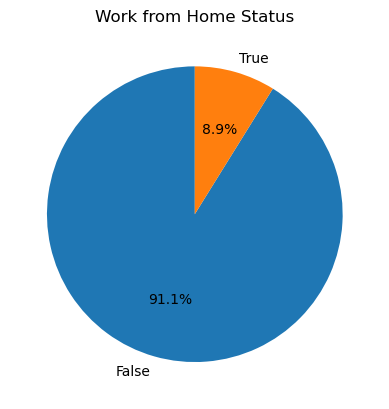

In [12]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle = 90, autopct = '%.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

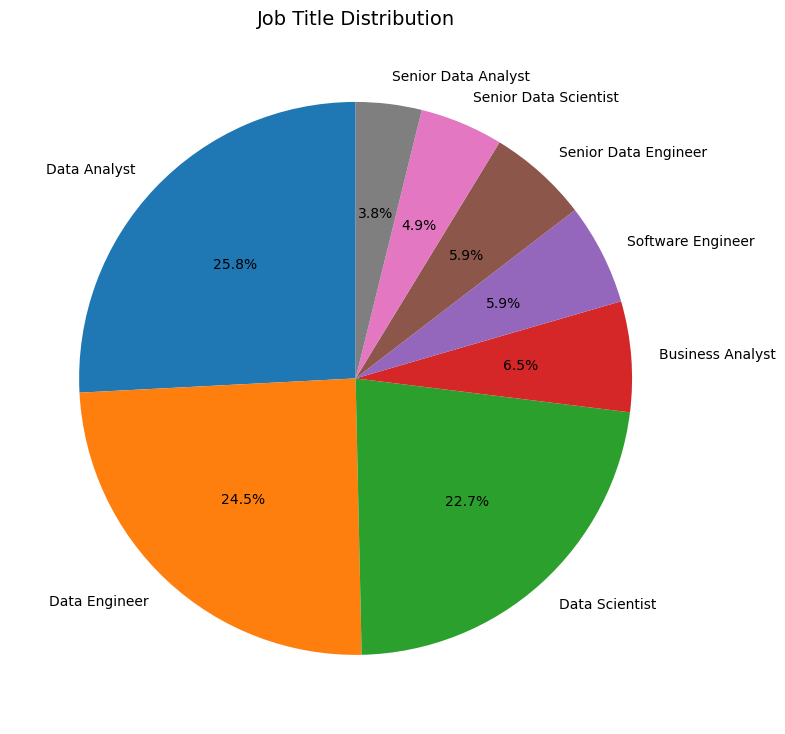

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))  # Adjust size as needed
df['job_title_short'].value_counts().head(8).plot(
    kind='pie',
    startangle=90,
    autopct='%.1f%%',
    textprops={'fontsize': 10}  # Optional: make labels smaller
)
plt.title('Job Title Distribution', fontsize=14)
plt.ylabel('')
plt.tight_layout()  # Ensures no clipping
plt.show()

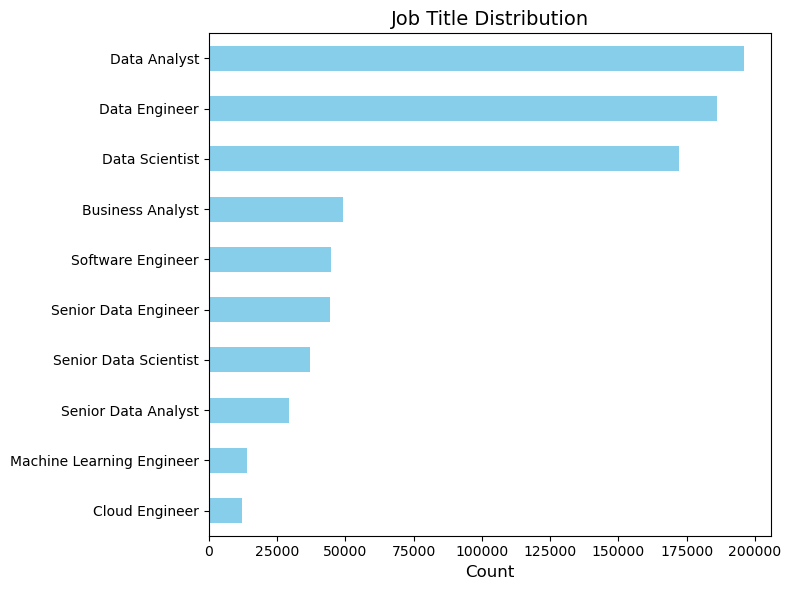

In [27]:
# Set a larger figure size to improve layout
plt.figure(figsize=(8, 6))

# Plot horizontal bar chart
df['job_title_short'].value_counts().plot(kind='barh', color='skyblue')

# Add title and remove y-axis label
plt.title('Job Title Distribution', fontsize=14)
plt.ylabel('')
plt.xlabel('Count', fontsize=12)

# Invert y-axis so most common job is at the top
plt.gca().invert_yaxis()

# Make layout tight to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


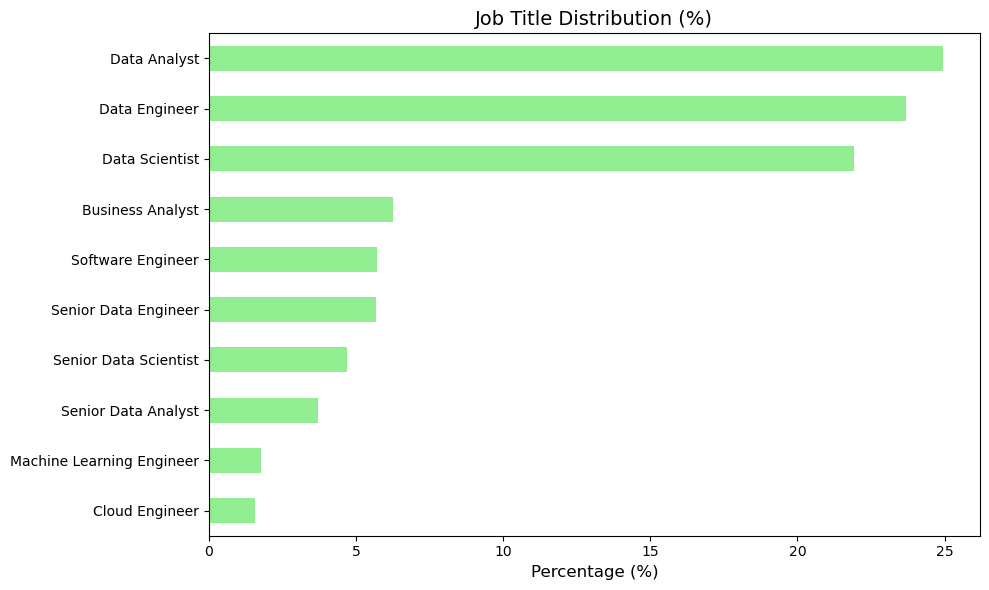

In [24]:
job_counts = df['job_title_short'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
job_counts.plot(kind='barh', color='lightgreen')
plt.title('Job Title Distribution (%)', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [29]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


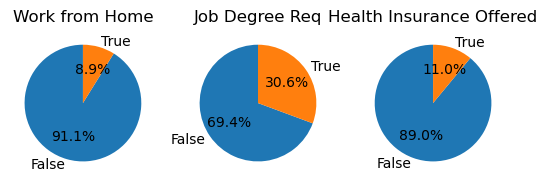

In [40]:
fig, ax = plt.subplots(1, 3)
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}
for i, (column, title) in enumerate(dict_column.items()):
  ax[i].pie(df[column].value_counts(), startangle = 90, autopct = '%.1f%%', labels=['False', 'True'])
  ax[i].set_title(title)

plt.show()